In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import kernel_ridge
import random

## Import Data

In [344]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [345]:
# Group data into blocks
blocks_X = np.reshape(X_data, (84,720))
blocks_Y = np.reshape(Y_data, (84,720))
print('Naive occupancy')
print(blocks_X[0,:10])
print('Actual occupancy')
print(blocks_Y[0,:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [346]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (84))
print(block_names[0])

11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21


In [347]:
# Define morning as 8-13 and evening 13-18
x_morning = blocks_X[:,:300]
x_evening = blocks_X[:,300:]
y_morning = blocks_Y[:,:300]
y_evening = blocks_Y[:,300:]

print(x_morning.shape)
print(x_evening.shape)

(84, 300)
(84, 420)


In [348]:
uncorr = np.concatenate((np.arange(14,28), np.arange(42,49)))

x_morning_uncorr = x_morning[uncorr]
y_morning_uncorr = y_morning[uncorr]


x_morning_corr = np.delete(x_morning, uncorr, axis=0)
y_morning_corr = np.delete(y_morning, uncorr, axis=0)

x_evening_uncorr = x_evening[uncorr]
y_evening_uncorr = y_evening[uncorr]

x_evening_corr = np.delete(x_evening, uncorr, axis=0)
y_evening_corr = np.delete(y_evening, uncorr, axis=0)

block__uncorr = block_names[uncorr]
block_corr = np.delete(block_names, uncorr)
print("Uncorrelated blocks:")
print(block_uncorr)

Uncorrelated blocks:
['1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/21'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/22'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/23'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/24'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/25'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/26'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/28'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/21'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/22'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/23'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/24'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/25'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/26'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/28'
 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/21'
 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/22'
 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/23'
 'BOYLSTON AVE BETWEEN E PIKE ST

In [349]:
def test_m_model(x_test, y_test, prediction, block, n):
    test_mae = 0
    naive_mae = 0
    time = np.arange(300)
    plt.figure(figsize=(16,16))
    for i in range(n):
        plt.subplot(int(n/2), 2, i+1)
        plt.plot(time, x_test[i], color='r', label='Naive')
        plt.plot(time, y_test[i], color='b', label='Actual')
        plt.plot(time, prediction[i], color='g', label='Prediction')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,360,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(block[i])
        test_mae += np.mean(np.abs(y_test[i]-prediction[i]))
        naive_mae += np.mean(np.abs(y_test[i]-x_test[i]))
    plt.tight_layout()
    plt.show()

    print("Prediction MAE:")
    print(test_mae/n)
    print("Naive MAE:")
    print(naive_mae/n)

## Morning Correlated Model

In [350]:
rand_sample_c = random.sample(range(len(x_morning_corr)), 10)
print(rand_sample_c)

[58, 15, 59, 5, 44, 46, 50, 29, 31, 52]


In [351]:
xmc_test = x_morning_corr[rand_sample_c]
xmc_train = np.delete(x_morning_corr, rand_sample, axis=0)
ymc_test = y_morning_corr[rand_sample_c]
ymc_train = np.delete(y_morning_corr, rand_sample, axis=0)
blockmc_test = block_corr[rand_sample_c]
print(ymc_test.shape)
print("Test blocks:")
print(blockmc_test)

(10, 300)
Test blocks:
['ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N 2022/03/23'
 '6TH AVE N BETWEEN JOHN ST AND THOMAS ST 2022/03/22'
 'ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/23'
 'FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST 2022/03/25'
 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST 2022/03/22'
 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/22'
 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST 2022/03/24'
 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST 2022/03/24']


In [352]:
lambda_val = 0.1
gamma = 0.001

rrg_mc = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [353]:
rrg_mc.fit(xmc_train, ymc_train)
prediction_mc = rrg_mc.predict(xmc_test)

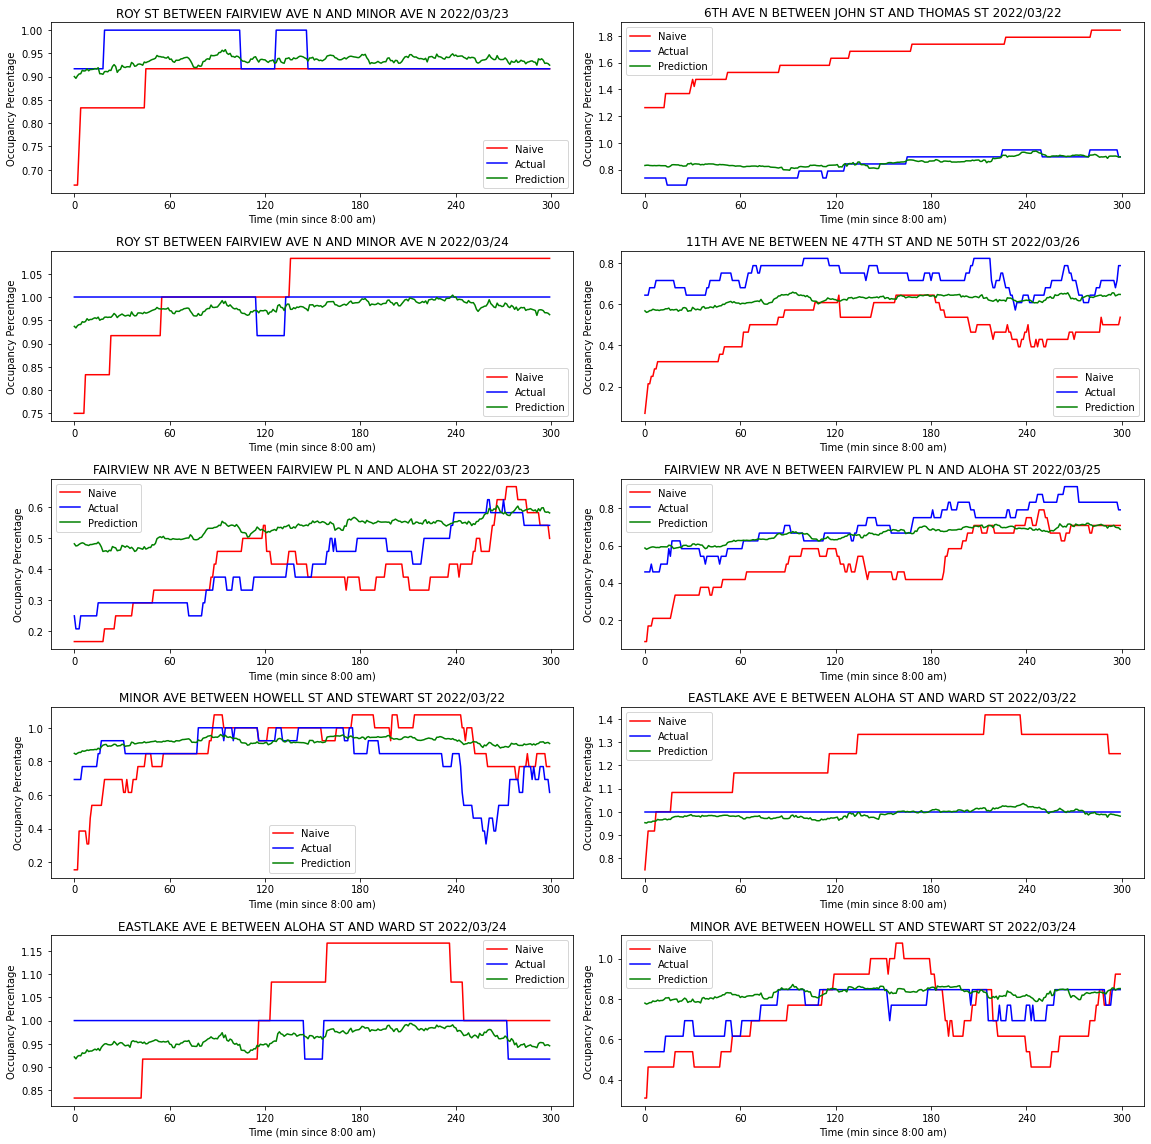

Prediction MAE:
0.06527741591620048
Naive MAE:
0.2060693333333333


In [354]:
test_m_model(xmc_test, ymc_test, prediction_mc, blockmc_test, 10)

## Evening Correlated Model

In [355]:
def test_e_model(x_test, y_test, prediction, block, n):
    test_mae = 0
    naive_mae = 0
    time = np.arange(300,720)
    plt.figure(figsize=(16,16))
    for i in range(n):
        plt.subplot(int(n/2), 2, i+1)
        plt.plot(time, x_test[i], color='r', label='Naive')
        plt.plot(time, y_test[i], color='b', label='Actual')
        plt.plot(time, prediction[i], color='g', label='Prediction')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(300,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(block[i])
        test_mae += np.mean(np.abs(y_test[i]-prediction[i]))
        naive_mae += np.mean(np.abs(y_test[i]-x_test[i]))
    plt.tight_layout()
    plt.show()

    print("Prediction MAE:")
    print(test_mae/n)
    print("Naive MAE:")
    print(naive_mae/n)

In [356]:
xec_test = x_evening_corr[rand_sample_c]
xec_train = np.delete(x_evening_corr, rand_sample, axis=0)
yec_test = y_evening_corr[rand_sample_c]
yec_train = np.delete(y_evening_corr, rand_sample, axis=0)

print(yec_test.shape)

(10, 420)


In [357]:
lambda_val = 0.1
gamma = 0.001

rrg_ec = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [358]:
rrg_ec.fit(xec_train, yec_train)
prediction_ec = rrg_ec.predict(xec_test)

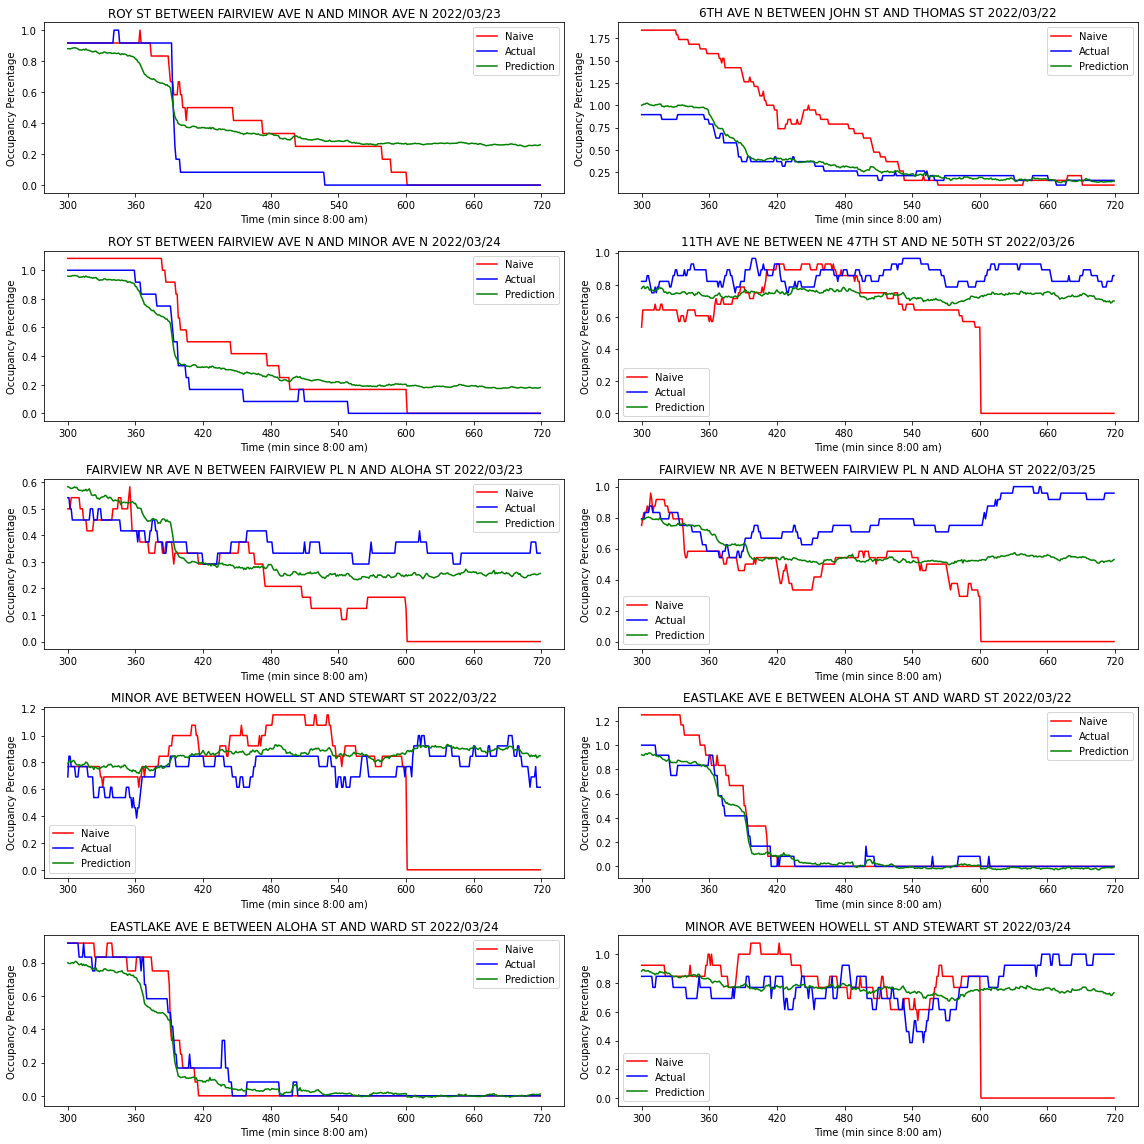

Prediction MAE:
0.11246168704482032
Naive MAE:
0.24204285714285714


In [359]:
test_e_model(xec_test, yec_test, prediction_ec, blockmc_test, 10)

## Combined Morning and Evening Correlated Model

In [360]:
def test_model(x_test, y_test, prediction, block, n):
    test_mae = 0
    naive_mae = 0
    time = np.arange(720)
    plt.figure(figsize=(16,16))
    for i in range(n):
        plt.subplot(int(n/2), 2, i+1)
        plt.plot(time, x_test[i], color='r', label='Naive')
        plt.plot(time, y_test[i], color='b', label='Actual')
        plt.plot(time, prediction[i], color='g', label='Prediction')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(block[i])
        test_mae += np.mean(np.abs(y_test[i]-prediction[i]))
        naive_mae += np.mean(np.abs(y_test[i]-x_test[i]))
    plt.tight_layout()
    plt.show()

    print("Prediction MAE:")
    print(test_mae/n)
    print("Naive MAE:")
    print(naive_mae/n)

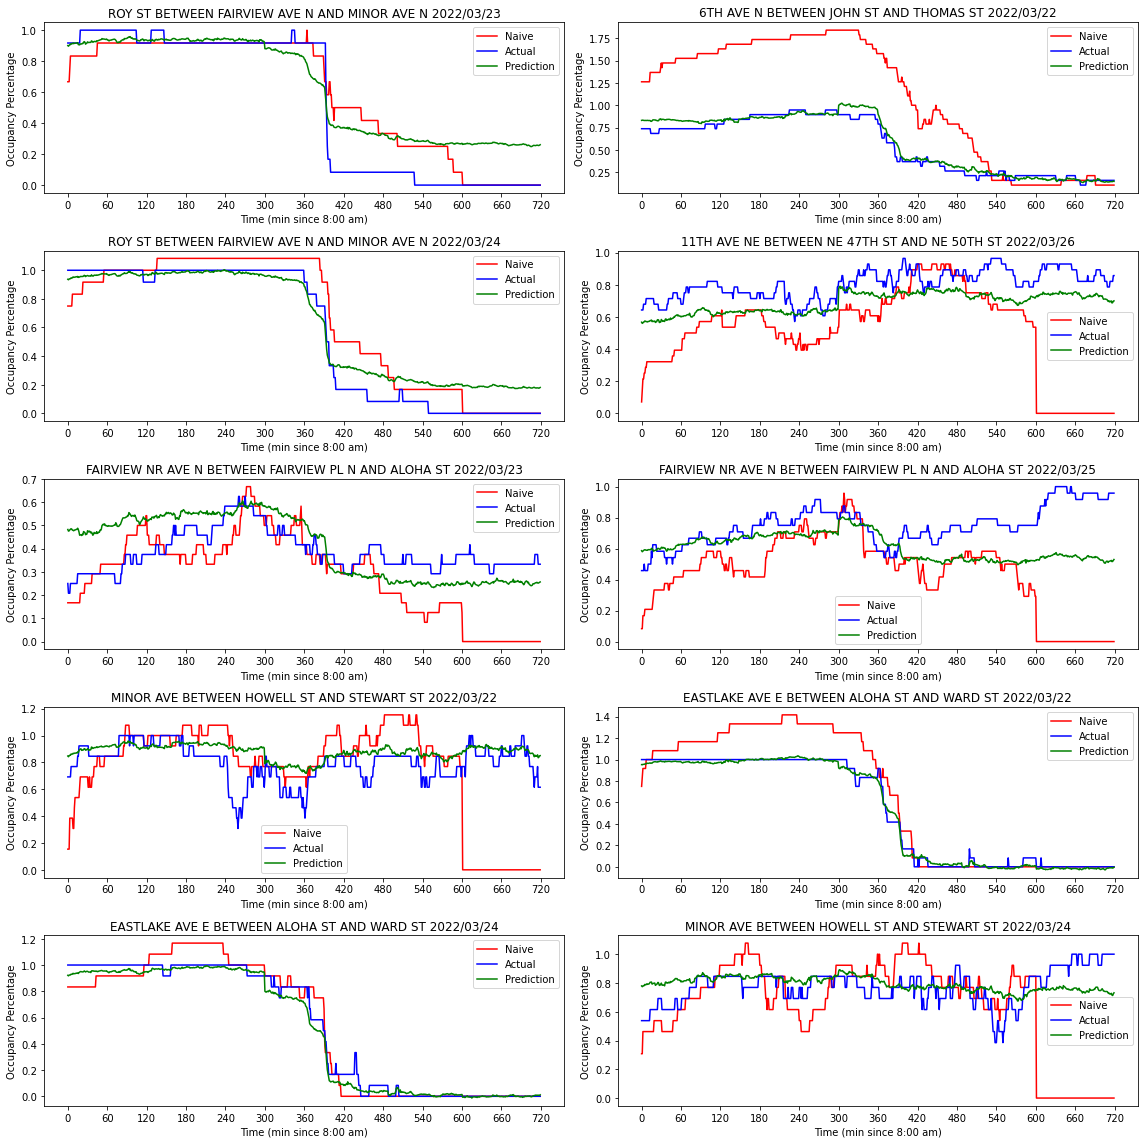

Prediction MAE:
0.09280157407456203
Naive MAE:
0.2270538888888889


In [361]:
x_c = np.concatenate((xmc_test, xec_test),axis=1)
y_c = np.concatenate((ymc_test, yec_test),axis=1)
prediction_c = np.concatenate((prediction_mc, prediction_ec), axis=1)
test_model(x_c, y_c, prediction_c, blockmc_test, 10)

## Full Day Correlated Model

In [362]:
x_corr = np.delete(blocks_X, uncorr, axis=0)
y_corr = np.delete(blocks_Y, uncorr, axis=0)

In [363]:
xc_test = x_corr[rand_sample_c]
xc_train = np.delete(x_corr, rand_sample, axis=0)
yc_test = y_corr[rand_sample_c]
yc_train = np.delete(y_corr, rand_sample, axis=0)

In [364]:
lambda_val = 0.1
gamma = 0.001

rrg_c = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

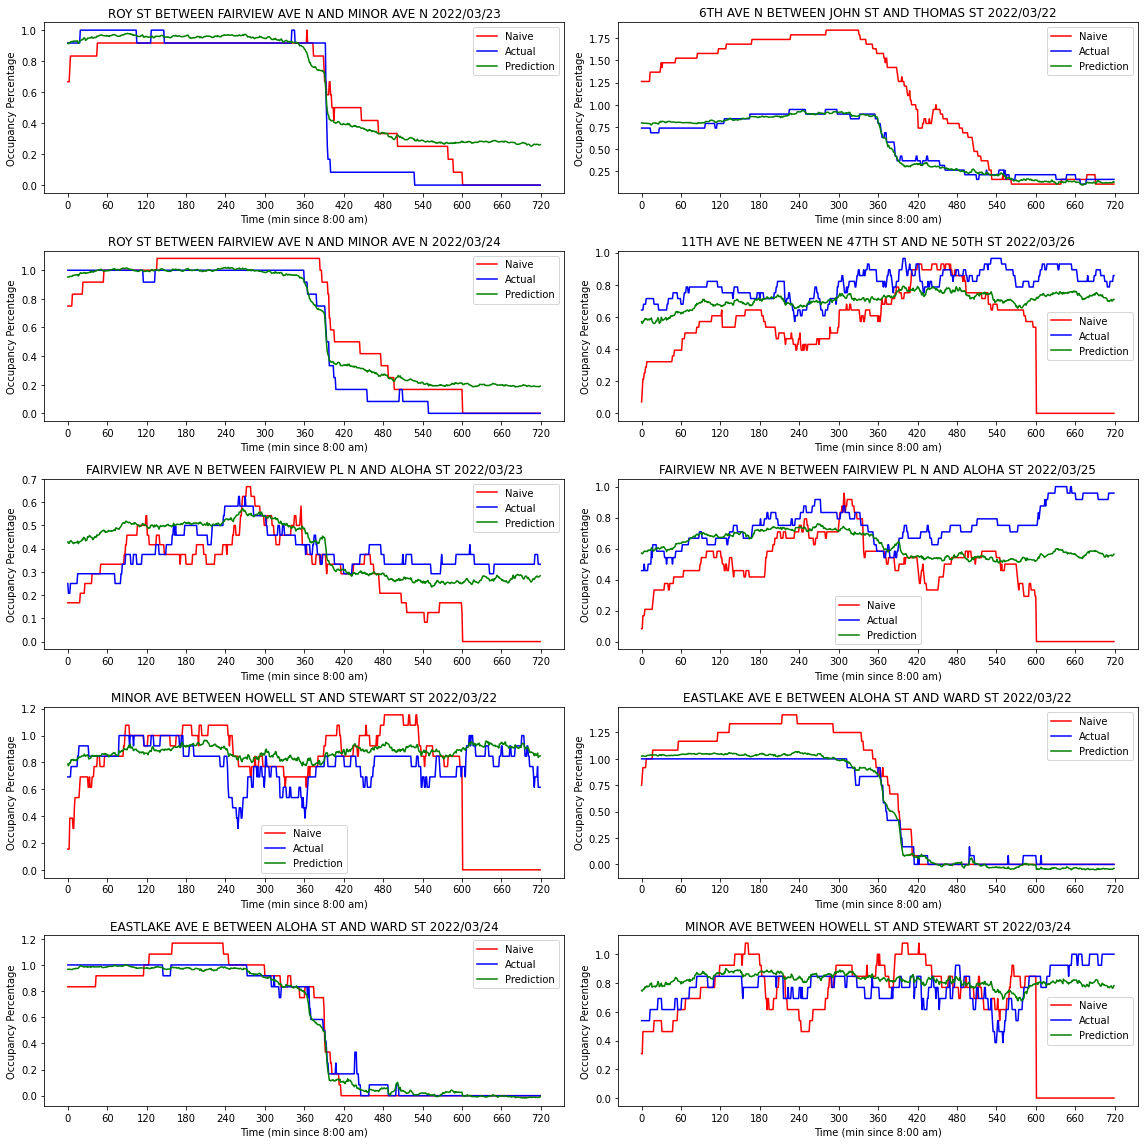

Prediction MAE:
0.08744831968919332
Naive MAE:
0.2270538888888889


In [365]:
rrg_c.fit(xc_train, yc_train)
prediction_c = rrg_c.predict(xc_test)
test_model(xc_test, yc_test, prediction_c, blockmc_test, 10)

## Morning Uncorrelated Model

In [366]:
rand_sample_u = random.sample(range(len(x_morning_uncorr)), 4)
print(rand_sample_u)

[17, 7, 1, 11]


In [367]:
xmu_test = x_morning_uncorr[rand_sample_u]
xmu_train = np.delete(x_morning_uncorr, rand_sample_u, axis=0)
ymu_test = y_morning_uncorr[rand_sample_u]
ymu_train = np.delete(y_morning_uncorr, rand_sample_u, axis=0)
blockmu_test = block_uncorr[rand_sample_u]
print(ymu_test.shape)
print("Test blocks:")
print(blockmu_test)

(4, 300)
Test blocks:
['BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST 2022/03/24'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/21'
 '1ST AVE BETWEEN BELL ST AND BATTERY ST 2022/03/22'
 '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST 2022/03/25']


In [368]:
lambda_val = 0.1
gamma = 0.001

rrg_mu = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [369]:
rrg_mu.fit(xmu_train, ymu_train)
prediction_mu = rrg_mu.predict(xmu_test)

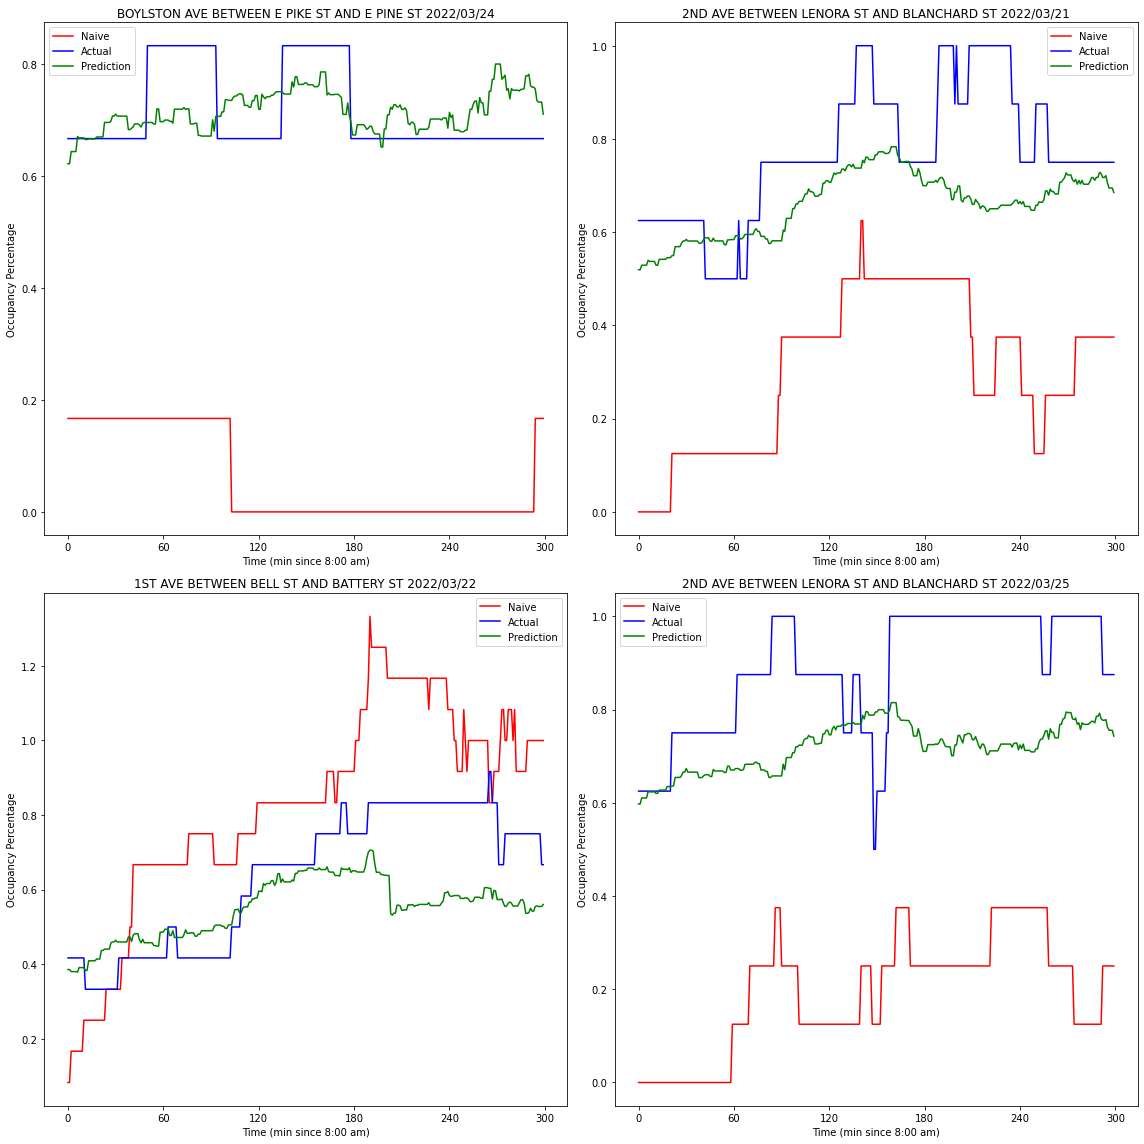

Prediction MAE:
0.12294745984383965
Naive MAE:
0.5075858333333334


In [370]:
test_m_model(xmu_test, ymu_test, prediction_mu, blockmu_test, 4)

## Evening Uncorrelated Model

In [371]:
xeu_test = x_evening_uncorr[rand_sample_u]
xeu_train = np.delete(x_evening_uncorr, rand_sample_u, axis=0)
yeu_test = y_evening_uncorr[rand_sample_u]
yeu_train = np.delete(y_evening_uncorr, rand_sample_u, axis=0)

print(yeu_test.shape)

(4, 420)


In [372]:
lambda_val = 0.1
gamma = 0.001

rrg_eu = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

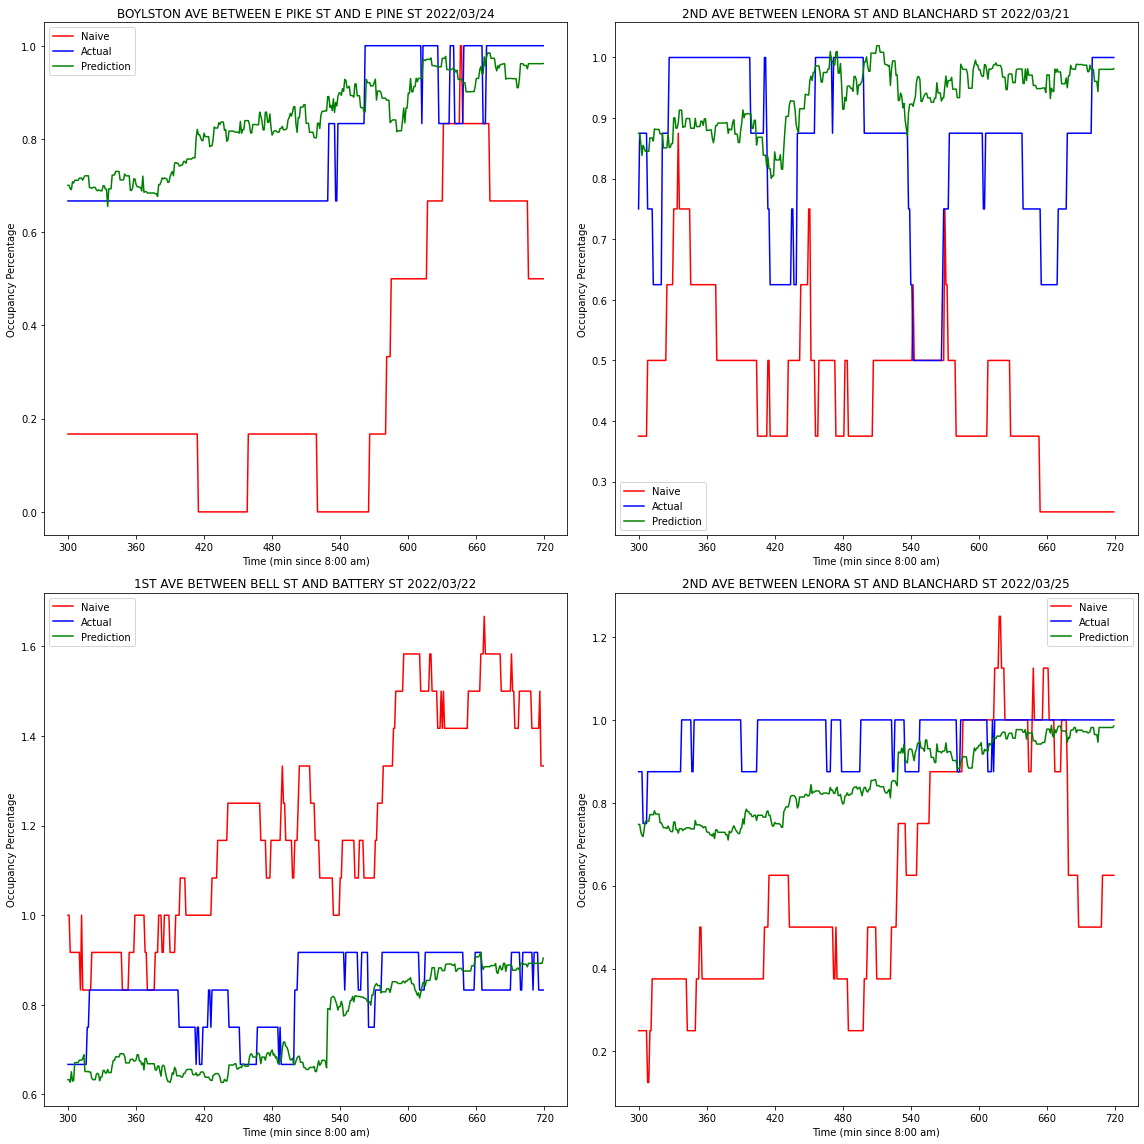

Prediction MAE:
0.11048723014116561
Naive MAE:
0.41484940476190474


In [373]:
rrg_eu.fit(xeu_train, yeu_train)
prediction_eu = rrg_eu.predict(xeu_test)
test_e_model(xeu_test, yeu_test, prediction_eu, blockmu_test, 4)

## Combined Morning and Evening Correlated Model

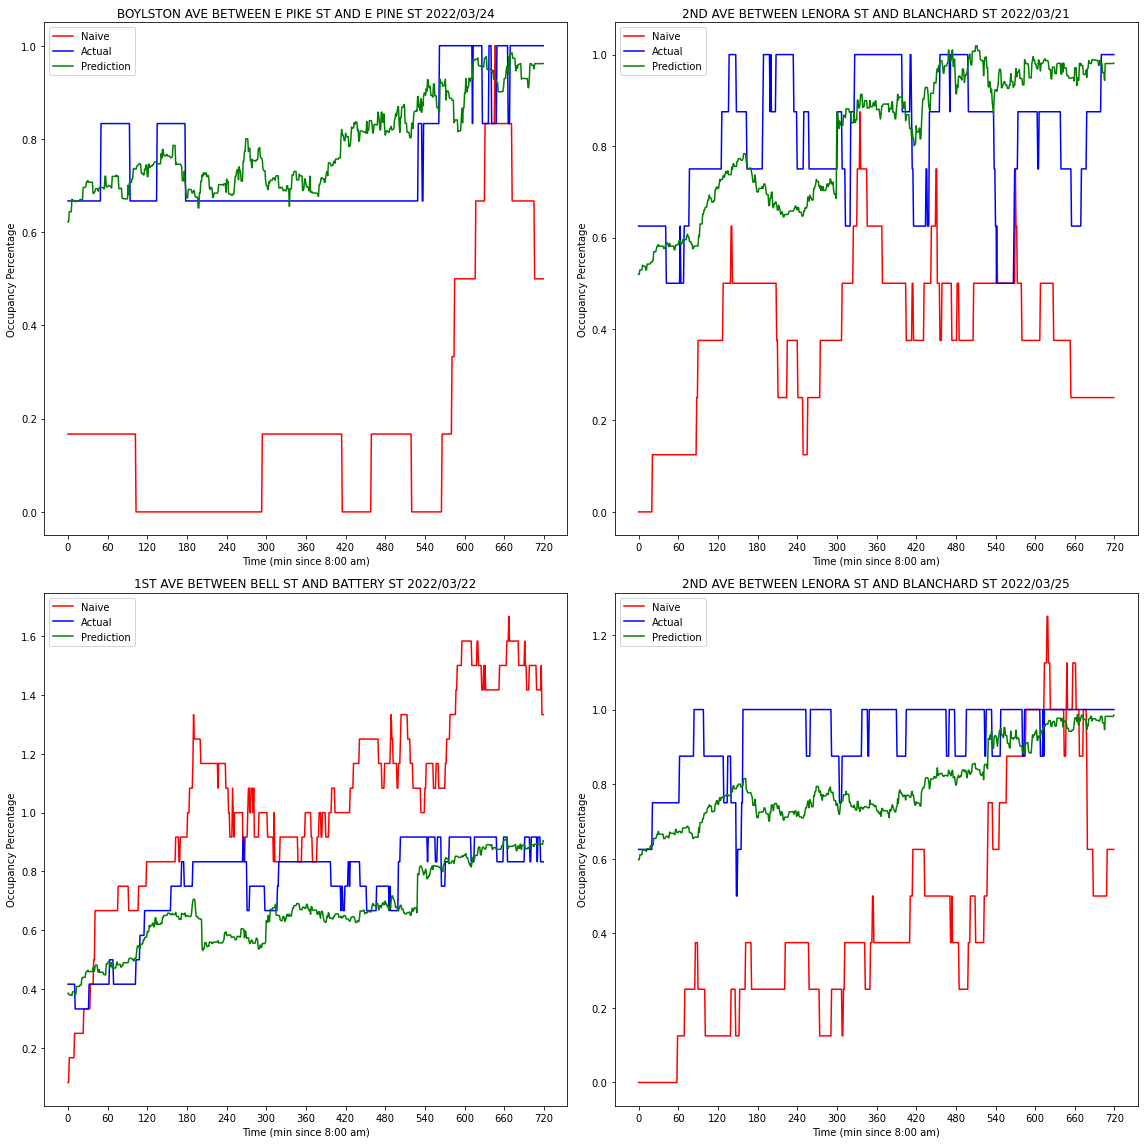

Prediction MAE:
0.11567899251727978
Naive MAE:
0.4534895833333333


In [374]:
x_u = np.concatenate((xmu_test, xeu_test),axis=1)
y_u = np.concatenate((ymu_test, yeu_test),axis=1)
prediction_u = np.concatenate((prediction_mu, prediction_eu), axis=1)
test_model(x_u, y_u, prediction_u, blockmu_test, 4)

## Full Day Uncorrelated Model

In [375]:
x_uncorr = blocks_X[uncorr]
y_uncorr = blocks_Y[uncorr]

In [376]:
xu_test = x_uncorr[rand_sample_u]
xu_train = np.delete(x_uncorr, rand_sample_u, axis=0)
yu_test = y_uncorr[rand_sample_u]
yu_train = np.delete(y_uncorr, rand_sample_u, axis=0)

In [377]:
lambda_val = 0.1
gamma = 0.001

rrg_u = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

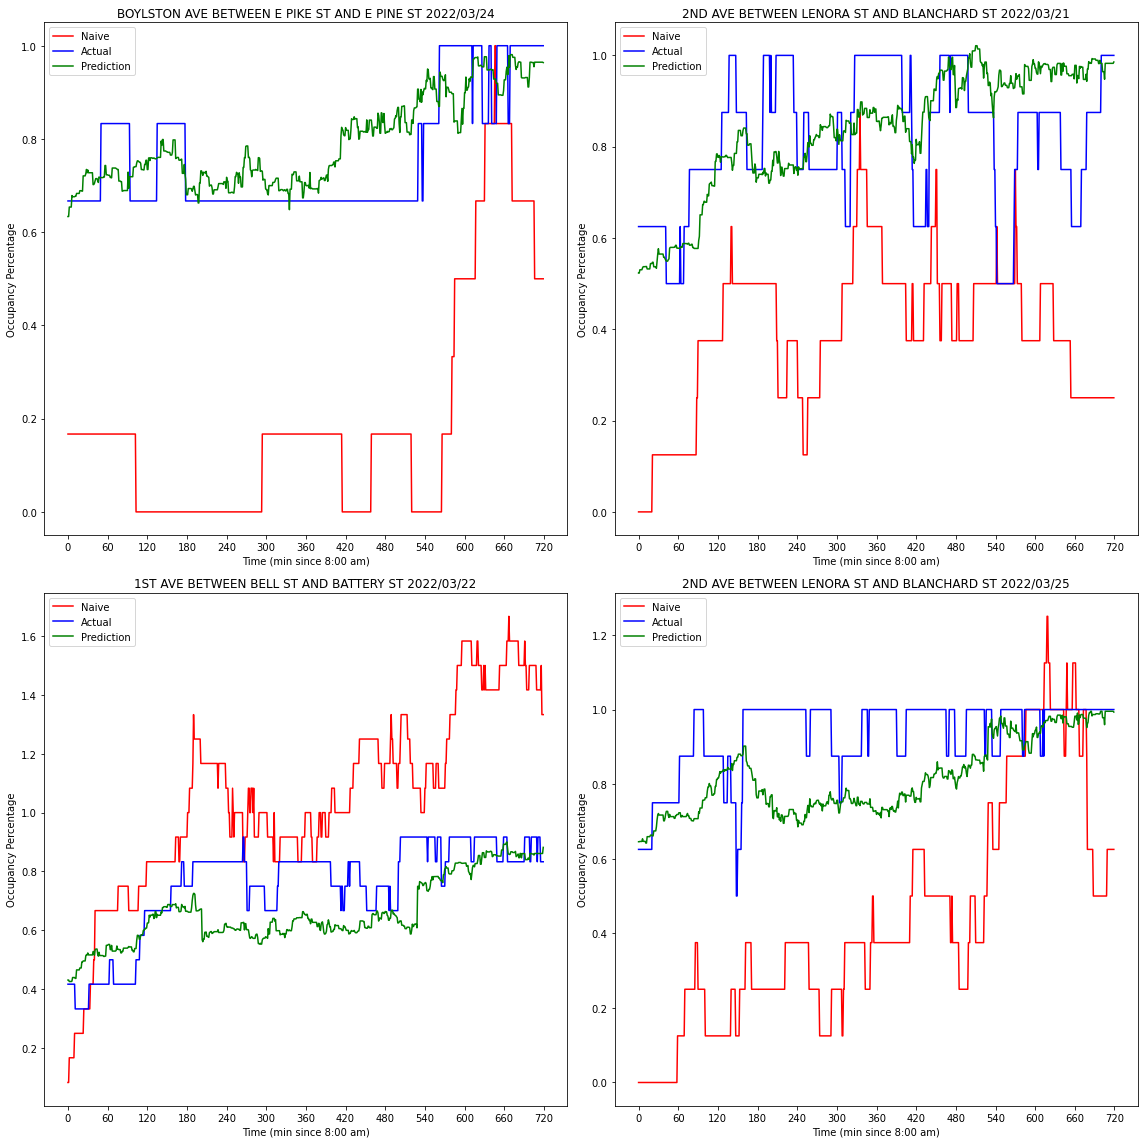

Prediction MAE:
0.11515586080291196
Naive MAE:
0.4534895833333333


In [378]:
rrg_u.fit(xu_train, yu_train)
prediction_u = rrg_u.predict(xu_test)
test_model(xu_test, yu_test, prediction_u, blockmu_test, 4)